In [1]:
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow import keras
from tensorflow.keras import layers
import keras.layers
import cv2
import os
from sklearn.model_selection import train_test_split
# from skimage.io import imread

In [2]:
#initializing the cnn
model=Sequential()

In [3]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Creating training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Multi_class_classification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Multi_class_classification/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 676 images belonging to 5 classes.
Found 78 images belonging to 5 classes.


In [5]:
training_set.class_indices

{'earVentilationTube': 0,
 'earwax': 1,
 'normal': 2,
 'otitisexterna': 3,
 'tympanoskleros': 4}

In [6]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [7]:
inputs = keras.Input((64, 64, 3))
x = keras.layers.Conv2D(filters = 256, kernel_size = 2, activation = 'relu', padding = 'same')(inputs)
x = keras.layers.Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = keras.layers.Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(5, activation = 'softmax')(x)

model = keras.Model(inputs = inputs, outputs = output)

In [8]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr = 0.001),
    metrics=["accuracy"]
)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["accuracy"]
)

In [10]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 256)       3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       131200    
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       65664     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                             

In [11]:
history = model.fit(training_set , epochs = 90 , validation_data=(test_set))
# in 200 epochs we should get good accuracy

Epoch 1/90
22/22 [==============================] - 107s 5s/step - loss: 0.9988 - accuracy: 0.6849 - val_loss: 1.2038 - val_accuracy: 0.6667
Epoch 2/90
22/22 [==============================] - 71s 3s/step - loss: 0.9043 - accuracy: 0.7101 - val_loss: 1.0526 - val_accuracy: 0.6667
Epoch 3/90
22/22 [==============================] - 71s 3s/step - loss: 0.9060 - accuracy: 0.7101 - val_loss: 1.0681 - val_accuracy: 0.6667
Epoch 4/90
22/22 [==============================] - 71s 3s/step - loss: 0.9148 - accuracy: 0.7101 - val_loss: 1.0587 - val_accuracy: 0.6667
Epoch 5/90
22/22 [==============================] - 71s 3s/step - loss: 0.9189 - accuracy: 0.7101 - val_loss: 1.0647 - val_accuracy: 0.6667
Epoch 6/90
22/22 [==============================] - 71s 3s/step - loss: 0.9004 - accuracy: 0.7101 - val_loss: 1.0587 - val_accuracy: 0.6667
Epoch 7/90
22/22 [==============================] - 70s 3s/step - loss: 0.9077 - accuracy: 0.7101 - val_loss: 1.0505 - val_accuracy: 0.6667
Epoch 8/90
22/22 [=

In [12]:
model.save('/content/drive/MyDrive/Multi_class_classification/result.hdf5')

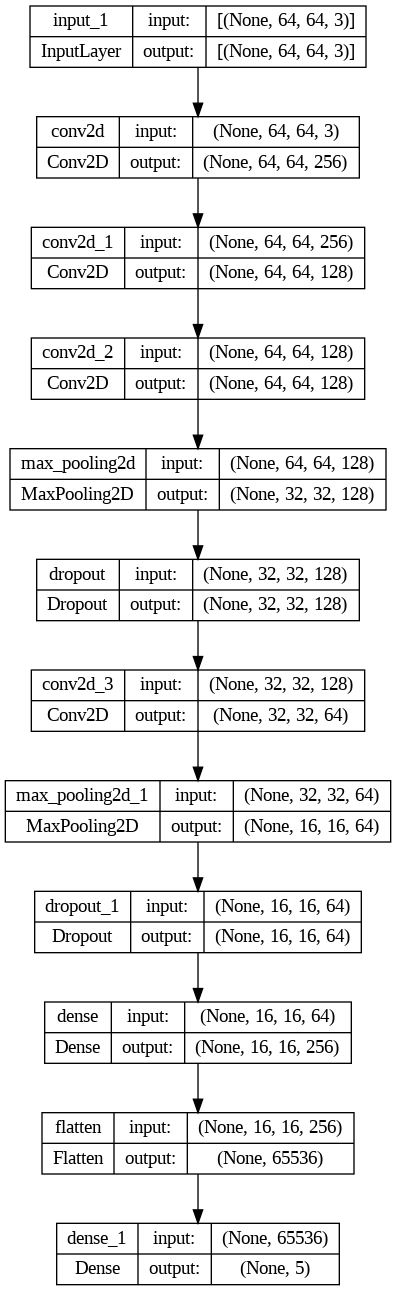

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

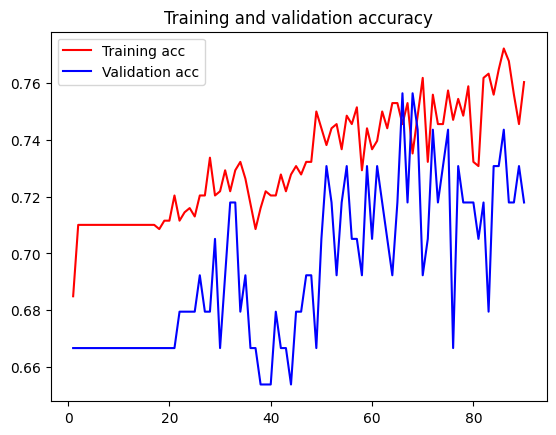

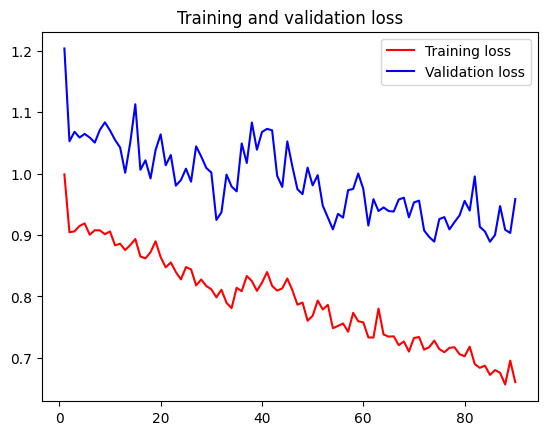

In [14]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

'aom': 0,
 'csom': 1,
 'earVentilationTube': 2,
 'earwax': 3,
 'foreignObjectEar': 4,
 'normal': 5,
 'otitisexterna': 6,
 'pseudoMembranes': 7,
 'tympanoskleros': 8

In [15]:
# dir_path = '/content/drive/MyDrive/Multi_class_classification/validation'

# # img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# # plt.imshow(img)

# {
#   'aom' : 0,  
#   'csom': 1,
#  'earVentilationTube': 2,
#  'earwax': 3,
#  'foreignObjectEar': 4,
#  'normal': 5,
#  'otitisexterna': 6,
#  'pseudoMembranes': 7,
#  'tympanoskleros': 8}

# for i in os.listdir(dir_path):
#   img = image.load_img(dir_path+'//'+i, target_size=(64,64))
#   plt.imshow(img)
#   plt.show()

#   X = image.img_to_array(img)
#   X = np.expand_dims(X , axis = 0)
#   images = np.vstack([X])
#   val = model.predict(images)
#   print(i)
#   # if val == 0:
#   #   print("abnormal")
#   # else if:
#   #   print("normal")
#   if val.any() == 0:
#     print("aom")
#   elif val.any() == 1:
#     print("csom")
#   elif val.any() == 2:
#     print("earVentilationTube")
#   elif val.any() == 3:
#     print("earwax")
#   elif val.any() == 4:
#     print("foreignObjectEar")
#   elif val.any() == 5:
#     print("normal")
#   elif val.any() == 6:
#     print("otitisexterna")
#   elif val.any() == 7:
#     print("pseudoMembranes")
#   elif val.any() == 8:
#     print("tympanoskleros")  
#   else:
#     print("Invalid class index")

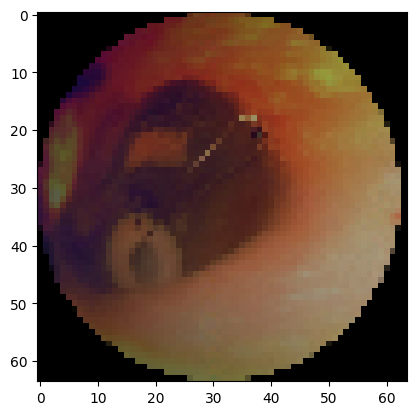

1/1 [==============================] - 0s 217ms/step
earVentilationTube (2).png
earwax


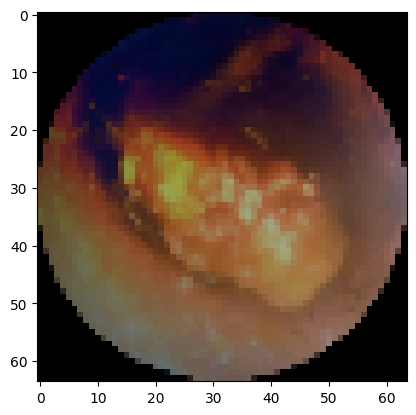

1/1 [==============================] - 0s 59ms/step
earwax (137).png
earwax


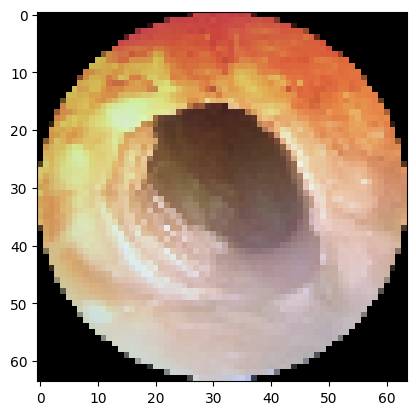

1/1 [==============================] - 0s 54ms/step
otitisexterna (26).png
earwax


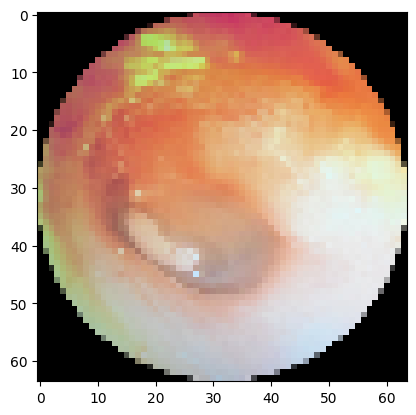

1/1 [==============================] - 0s 51ms/step
tympanoskleros (24).png
earwax


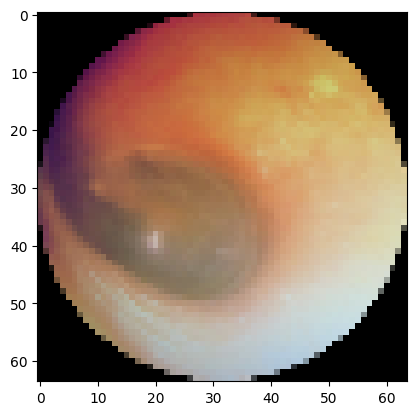

1/1 [==============================] - 0s 37ms/step
normal (440).png
earwax


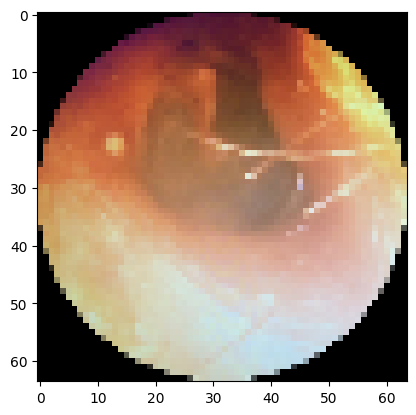

1/1 [==============================] - 0s 36ms/step
normal (464).png
earwax


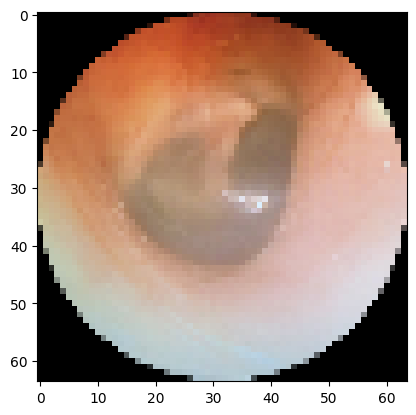

1/1 [==============================] - 0s 36ms/step
normal (635).png
earwax


In [16]:
dir_path = '/content/drive/MyDrive/Multi_class_classification/validation'

{'earVentilationTube': 0,
 'earwax': 1,
 'normal': 2,
 'otitisexterna': 3,
 'pseudoMembranes': 4,
 'tympanoskleros': 5}

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(64,64))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(i)

  if val.any()==0:
    print("Earventilationtube")
  elif val.any()==1:
    print("earwax")
  elif val.any()==2:
    print("normal")
  elif val.any()==3:
    print("otitisexterna")
  elif val.any()==4:
    print("pseudomembranes")
  elif val.any()==5:
    print("tymponoskleros")        


